In [ ]:
#apriori algorithm

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load Wholesale Customers dataset from the local server (assume wholesale_customers_data.csv is already uploaded)
df = pd.read_csv('/content/wholesale_customers_data.csv')

# Data Preprocessing
# Binarizing the data for Market Basket analysis
# For simplicity, let's consider any amount > 0 in a column as a purchase (1) and 0 otherwise
df_bin = df.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm
frequent_itemsets = apriori(df_bin, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display frequent itemsets and rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Frequent Itemsets:
     support                                           itemsets
0        1.0                                          (Channel)
1        1.0                                           (Region)
2        1.0                                            (Fresh)
3        1.0                                             (Milk)
4        1.0                                          (Grocery)
..       ...                                                ...
250      1.0  (Delicassen, Frozen, Region, Grocery, Fresh, D...
251      1.0  (Delicassen, Milk, Frozen, Region, Grocery, De...
252      1.0  (Delicassen, Milk, Frozen, Grocery, Fresh, Det...
253      1.0  (Delicassen, Milk, Frozen, Region, Grocery, Fr...
254      1.0  (Delicassen, Milk, Frozen, Region, Grocery, Fr...

[255 rows x 2 columns]

Association Rules:
             antecedents                                        consequents  \
0               (Region)                                          (Channel)   
1          

<ipython-input-1-4c2d4a3b6dfd>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_bin = df.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-2-13fca09d1ba5>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-2-13fca09d1ba5>:12: FutureWarnin

Accuracy: 80.97%


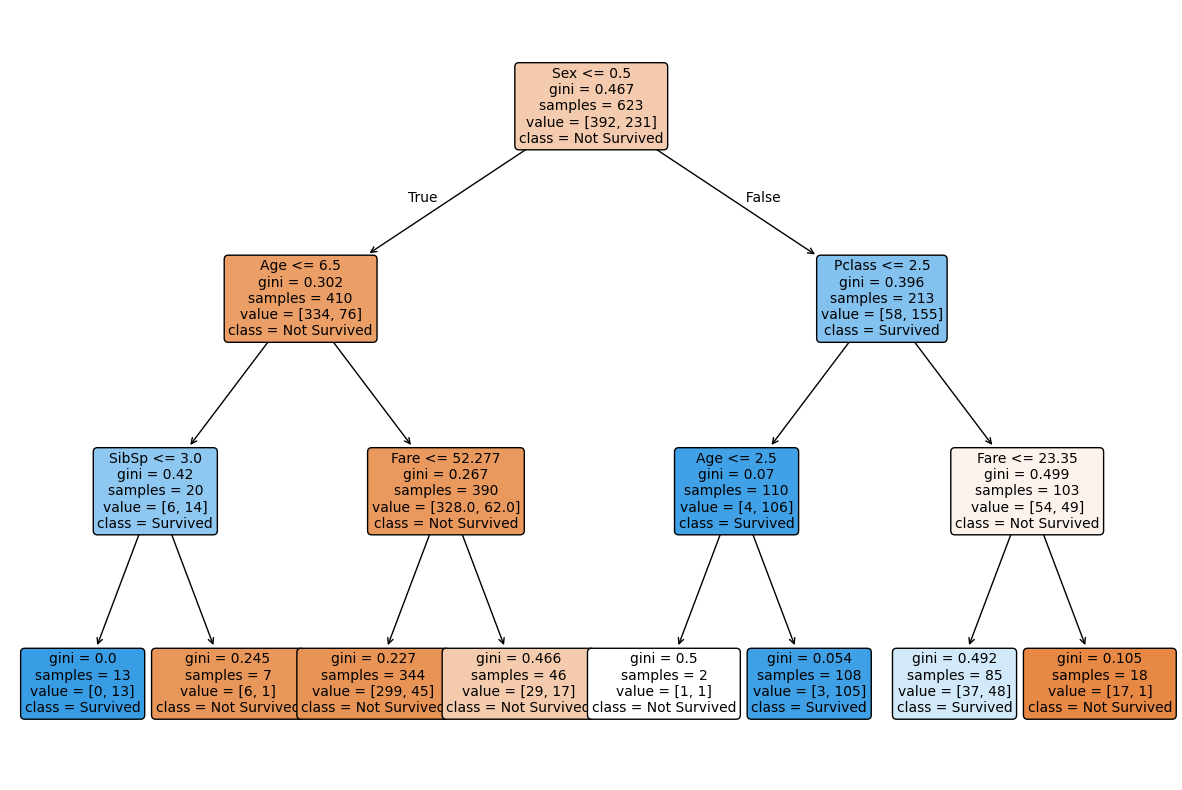

In [ ]:
#decision tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Titanic dataset from the local server (assume titanic.csv is already uploaded)
df = pd.read_csv('/content/titanic.csv')

# Data Preprocessing (handling missing values and encoding)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Selecting features and target variable
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Decision Tree model
model = DecisionTreeClassifier(max_depth=3)  # Limiting tree depth to make it readable
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Visualize the decision tree
plt.figure(figsize=(15,10))  # Increase figure size for better readability
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True, fontsize=10)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_commonnn.py:18: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(sklearn.__version__) < LooseVersion("0.23.0"):
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_commonnn.py:18: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(sklearn.__version__) < LooseVersion("0.23.0"):


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        1  
1        1776        2  
2        7844        2  
3        1788        1  
4        5185        0  


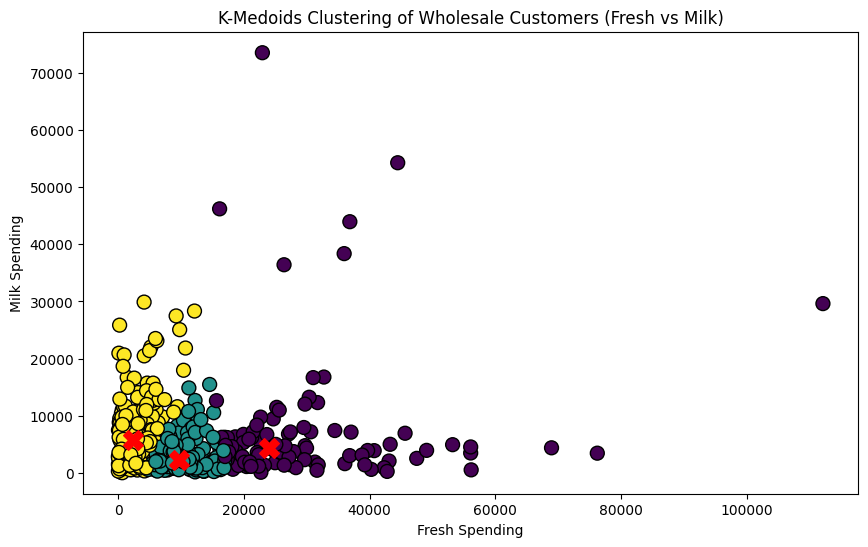

In [ ]:
#k-medoid
# Install scikit-learn-extra if not already installed
!pip install scikit-learn-extra

import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids

# Load Wholesale Customers dataset from the local server (assume wholesale_customers_data.csv is already uploaded)
df = pd.read_csv('/content/wholesale_customers_data.csv')

# Selecting features (Fresh and Milk spending)
X = df[['Fresh', 'Milk']]

# Apply K-Medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=42)
df['Cluster'] = kmedoids.fit_predict(X)

# Display the resulting DataFrame with clusters
print(df.head())

# Visualize the clusters
plt.figure(figsize=(10,6))

# Scatter plot of Fresh vs Milk, colored by cluster
plt.scatter(X['Fresh'], X['Milk'], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=100)

# Marking the cluster centers
centers = kmedoids.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')  # cluster centers in red with an 'X' marker

# Adding labels and title
plt.title('K-Medoids Clustering of Wholesale Customers (Fresh vs Milk)')
plt.xlabel('Fresh Spending')
plt.ylabel('Milk Spending')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


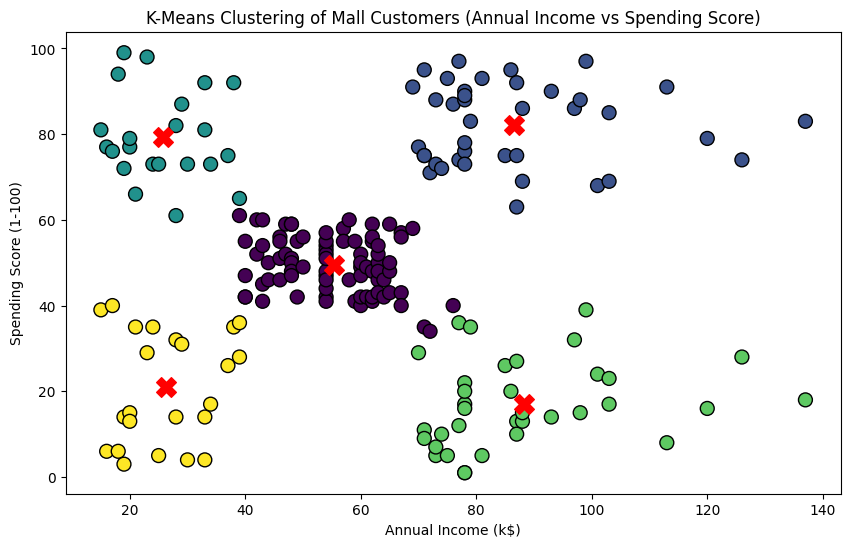

In [ ]:
#k-mean clustering
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load Mall Customers dataset from the local server (assume Mall_Customers.csv is already uploaded)
df = pd.read_csv('/content/Mall_Customers.csv')

# Selecting the features (Annual Income and Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Display the resulting DataFrame with clusters
print(df.head())

# Visualize the clusters
plt.figure(figsize=(10,6))

# Scatter plot of Annual Income vs Spending Score, colored by cluster
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=100)

# Marking the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')  # Cluster centers in red with an 'X' marker

# Adding labels and title
plt.title('K-Means Clustering of Mall Customers (Annual Income vs Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Display the plot
plt.show()


In [ ]:
#navie bayes
# Naive Bayes on Iris Dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load Iris dataset from the local server (assume iris.csv is already uploaded)
df = pd.read_csv('/content/Iris (1).csv')

# Split the data into features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Encode target variable if necessary (depending on dataset format)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1]:
import numpy as np

def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    """
    Compute the PageRank of each node in the graph.
    """
    # Step 1: Initialize variables
    N = M.shape[1]
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)
    e = np.ones((N, 1))

    # Step 2: Power iteration
    for _ in range(num_iterations):
        v = d * M @ v + (1 - d) * e / N

    # Step 3: Return PageRank vector
    return v

# Example usage:
M = np.array([[0, 0, 1, 0, 0],
              [0.5, 0, 0, 0, 0],
              [0.5, 0, 0, 0, 0],
              [0, 1, 0, 1, 0],
              [0, 0, 0, 0, 1]])

pagerank_values = pagerank(M)
print(pagerank_values)


[[0.08688845]
 [0.06692759]
 [0.06692759]
 [0.57925634]
 [0.20000002]]
